In [1]:
from pathlib import Path
import shutil
import os

def populate_folder(from_f, to_f, nb_from, nb_to):
    src = 'dataset/'+from_f
    trg = 'dataset/'+to_f
    files=os.listdir(src)
    
    i = nb_from+1
    for i in range(i, nb_to):
        img = src+"{}.png".format(i)
        shutil.copy2(img, trg)

In [12]:
import tensorflow as tf

def validate_image(file_name):
    tf.py_function(tf.print, inp=[file_name], Tout=[])
    image = tf.io.read_file(file_name)
    image = tf.io.decode_image(image, channels=3)
    return image

os.chdir(r'D:\00__WORK__ZONE\isi\miniprojet\dataset\train_set\normal')

accepted_extensions = ('jpg', 'png')

files = list(filter(lambda x: x.lower().endswith(accepted_extensions), os.listdir()))

ds = tf.data.Dataset.from_tensor_slices(files).map(validate_image)

for i in ds:
    pass

1.png
10.png
100.png
1000.png
1001.png
1002.png
1003.png
1004.png
1005.png
1006.png
1007.png
1008.png
1009.png
101.png
1010.png
1011.png
1012.png
1013.png
1014.png
1015.png
1016.png
1017.png
1018.png
1019.png
102.png
1020.png
1021.png
1022.png
1023.png
1024.png
1025.png
1026.png
1027.png
1028.png
1029.png
103.png
1030.png
1031.png
1032.png
1033.png
1034.png
1035.png
1036.png
1037.png
1038.png
1039.png
104.png
1040.png
1041.png
1042.png
1043.png
1044.png
1045.png
1046.png
1047.png
1048.png
1049.png
105.png
1050.png
1051.png
1052.png
1053.png
1054.png
1055.png
1056.png
1057.png
1058.png
1059.png
106.png
1060.png
1061.png
1062.png
1063.png
1064.png
1065.png
1066.png
1067.png
1068.png
1069.png
107.png
1070.png
1071.png
1072.png
1073.png
1074.png
1075.png
1076.png
1077.png
1078.png
1079.png
108.png
1080.png
1081.png
1082.png
1083.png
1084.png
1085.png
1086.png
1087.png
1088.png
1089.png
109.png
1090.png
1091.png
1092.png
1093.png
1094.png
1095.png
1096.png
1097.png
1098.png
1099.png
11.png


In [3]:
populate_folder("source_set/", "train_set/normal/", 0, 7372)
populate_folder("source_set/", "train_set/benign/", 9216, 9926)
populate_folder("source_set/", "train_set/malignant/", 10104, 10996)

In [4]:
populate_folder("source_set/", "test_set/normal/", 7372, 9215)
populate_folder("source_set/", "test_set/benign/", 9926, 10103)
populate_folder("source_set/", "test_set/malignant/", 10996, 11218)

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [38]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale= 1./255, horizontal_flip = True)
batch_size = 50
training_set = train_datagen.flow_from_directory(directory= 'dataset/train_set', target_size=(80, 80), batch_size=batch_size, classes = ['benign', 'malignant', 'normal'], class_mode='categorical')
test_set = test_datagen.flow_from_directory(directory= 'dataset/test_set', target_size=(80, 80), batch_size=batch_size, classes = ['benign', 'malignant', 'normal'], class_mode='categorical')

Found 8968 images belonging to 3 classes.
Found 2238 images belonging to 3 classes.


In [7]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, Dropout, Conv2D, Rescaling
from keras.layers import Dense

In [39]:
classifier = Sequential()
classifier.add(Convolution2D(filters=64, kernel_size=(3, 3), input_shape=(80, 80, 3), kernel_initializer='he_uniform', activation='relu'))
classifier.add(MaxPooling2D(pool_size=(5, 5)))
classifier.add(Flatten())
classifier.add(Dense(units=62, kernel_initializer='glorot_uniform', activation='relu'))
classifier.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
classifier.add(Dense(units=3, kernel_initializer='glorot_uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
training_set.n

2695

In [40]:
total_sample = training_set.n
n_epochs = 10
history = classifier.fit( training_set, validation_data= test_set, steps_per_epoch=int(total_sample/batch_size), epochs=n_epochs, batch_size= batch_size)

Epoch 1/10
179/179 [==============================] - 31s 169ms/step - loss: 0.6619 - accuracy: 0.8016 - val_loss: 0.5411 - val_accuracy: 0.8280
Epoch 2/10
179/179 [==============================] - 32s 180ms/step - loss: 0.5015 - accuracy: 0.8322 - val_loss: 0.4950 - val_accuracy: 0.8400
Epoch 3/10
179/179 [==============================] - 32s 181ms/step - loss: 0.4568 - accuracy: 0.8413 - val_loss: 0.5130 - val_accuracy: 0.8365
Epoch 4/10
179/179 [==============================] - 33s 182ms/step - loss: 0.4208 - accuracy: 0.8513 - val_loss: 0.4781 - val_accuracy: 0.8356
Epoch 5/10
179/179 [==============================] - 31s 174ms/step - loss: 0.3865 - accuracy: 0.8616 - val_loss: 0.4653 - val_accuracy: 0.8387
Epoch 6/10
179/179 [==============================] - 32s 176ms/step - loss: 0.3623 - accuracy: 0.8669 - val_loss: 0.4844 - val_accuracy: 0.8311
Epoch 7/10
179/179 [==============================] - 30s 170ms/step - loss: 0.3584 - accuracy: 0.8684 - val_loss: 0.5228 - val_ac

In [9]:
int(total_sample/batch_size)

310

In [315]:
import numpy as np
test_image = keras.utils.load_img('dataset/test_set/normal/7390.png', target_size = (80, 80, 3))
# Loading the image and converting the pixels into array whcih will be used as input to predict.
test_image = keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
    prediction = 'benign'
elif result[0][0] == 1:
    prediction = 'malignant'
else:
    prediction = 'normal'

1/1 [==============================] - 0s 23ms/step


In [316]:
prediction

'benign'

In [250]:
classifier.save('data.hdf5')

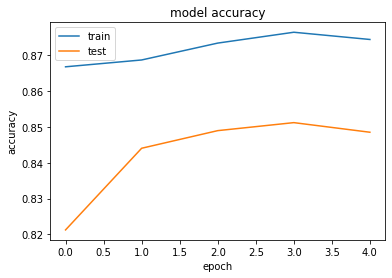

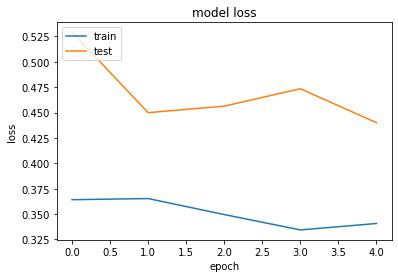

In [279]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [280]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [156]:
test_set.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

45/45 [==============================] - 4s 92ms/step


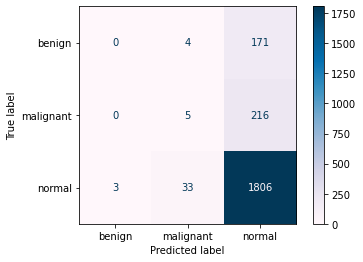

In [284]:
y_prediction = classifier.predict(test_set)
y_prediction = np.argmax(y_prediction, axis = 1)

cm = confusion_matrix(test_set.labels, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'malignant', 'normal'])

disp.plot(cmap=plt.cm.PuBu)
plt.show()